# Classification Models for the Obesity Dataset

**Report Contents**
1. Data description
2. Objective of the analysis
3. Data cleaning, EDA and insights
4. Classification models
5. Final model
6. Findings and suggestions

### 1. Data description

The [_data_](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub) is generated for the estimation of obesity levels of individuals from several countries. It also includes information on eating habits and physical conditions of the individuals.

Let's have a quick look at the data.

In [123]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

In [124]:
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

The first 5 column names explain the content, here are the explanations for abbreviated column names:
* FAVC: Frequent consumption of high caloric food
* FCVC: Frequency of consumption of vegetables
* NCP: Number of main meals
* CAEC: Consumption of food between meals
* CH2O: Consumption of water daily
* SCC: Calories consumption monitoring
* FAF: Physical activity frequency
* TUE: Time using technology devices
* CALC: Consumption of alcohol
* MTRANS:Transportation used
* NObeyesdad: Obesity level

Let's examine the values in the columns further.

In [126]:
for column in data.columns:
  if data[column].dtypes == object:
    print(data[column].value_counts())
    print("-----------------")

Male      1068
Female    1043
Name: Gender, dtype: int64
-----------------
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
-----------------
yes    1866
no      245
Name: FAVC, dtype: int64
-----------------
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64
-----------------
no     2067
yes      44
Name: SMOKE, dtype: int64
-----------------
no     2015
yes      96
Name: SCC, dtype: int64
-----------------
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64
-----------------
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64
-----------------
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NOb

In [127]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [128]:
data.dtypes.value_counts()

object     9
float64    8
dtype: int64

The data have 9 categorical and 8 numerical fields.

### 2. Objective of the analysis

The main goal of this analysis is to predict the obesity level (class) of the attendants, given their eating habits and pyhsical conditions. To do that, first, data will be cleaned and explored. According to the data exploration step, the relationship between the features and the target will be described and the important features will be identified for future use in the classification models. Finally, the quality of the predictions will be discussed along with further recommendations.

### 3.  Data cleaning, EDA and insights
#### 3.1. Data cleaning

The data is considered "clean" since null values do not exist and the categorical columns have meaningful unique categories.
#### 3.2. EDA and insights

To explore the data, relationships between several relevant features will be analyzed.

First, let's look at the pair-plots of between the features.

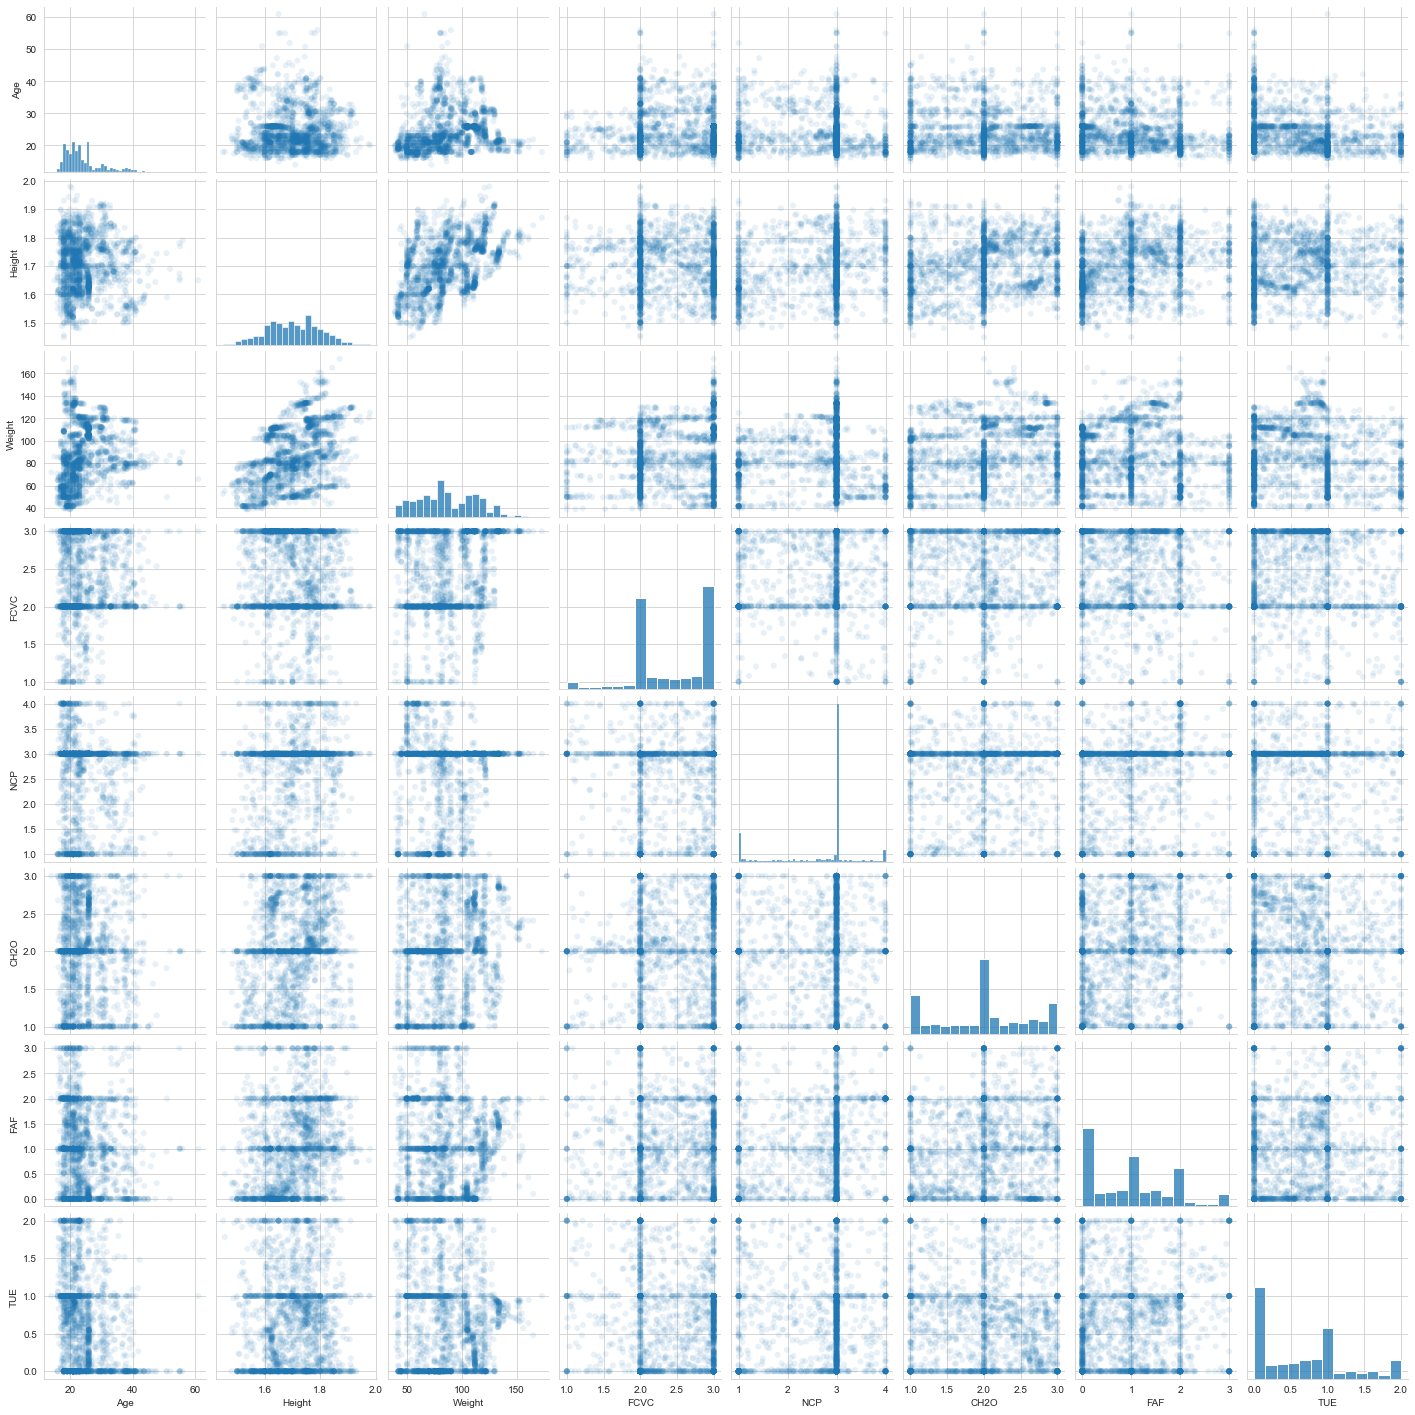

In [129]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

Several numerical columns actually derived from categories, and they follow an ordinal sense of setting as can be seen in these plots. For example, the column for physical activity _FAF_ is derived from the survey question which has categories instead of numbers as possible answers for attendants to give. That might be the reason there are visible accumulations of the observations on the integer thresholds of the columns.

According to the pair plots, it is assumed that these numerical columns do not have correlations between them.

Now, let's look at the relationships between the features and the target _obesity levels_ briefly.

In [130]:
data['NObeyesdad'].value_counts(normalize=True)

Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64

First, data seems balanced since the categories of the target have similar proportions in terms of number of appearance.

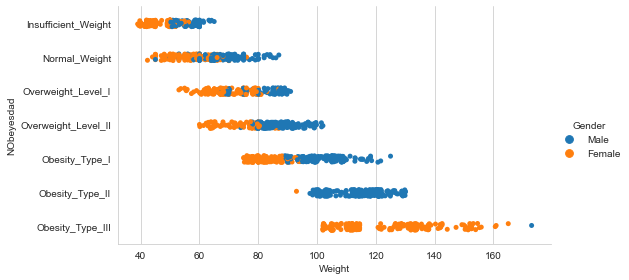

In [131]:
sns.set_style("whitegrid")
hue_ord = ["Male", "Female"]
data['NObeyesdad'] = pd.Categorical(data['NObeyesdad'],
                                    ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])
p = sns.catplot(y="NObeyesdad", x="Weight", hue="Gender", hue_order=hue_ord, data=data, height=4, aspect=2)

According to this plot, as weight increases, obesity level tend to increase in general. It is interesting that excluding the other factors, some female individuals are categorized in higher obesity levels even if they have similar weights with male individuals who are categorized in lower obesity levels. The kernel density estimate plots for the target categories and weight can be seen below.

In [132]:
categ = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
sets = [] # new dataframes will be created for each of the target categories
for c in categ:
    new_data = data.loc[data["NObeyesdad"] == c]
    new_data = new_data.rename(columns={'NObeyesdad': c})
    sets.append(new_data)

Text(0.5, 0.01, 'Weight')

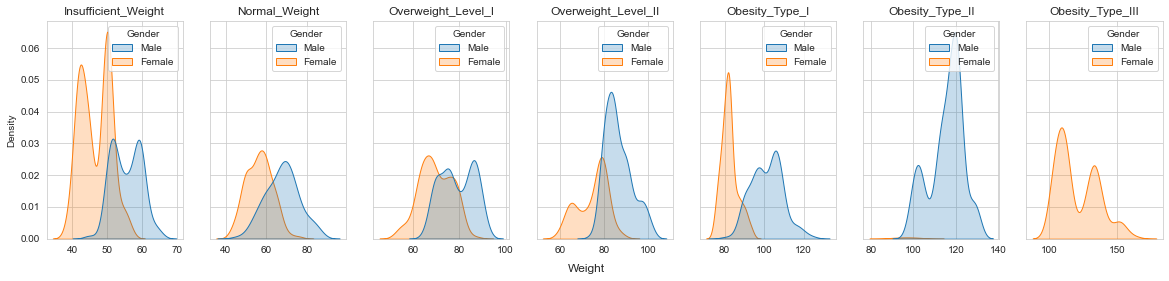

In [133]:
fig, axs = plt.subplots(1, len(sets), figsize=(20, 4), sharey=True)
for s in range(len(sets)):
    sns.kdeplot(data=sets[s], ax=axs[s], x="Weight", hue="Gender", hue_order=hue_ord, fill=True, warn_singular=False).set_title(categ[s])
    axs[s].set(xlabel=None)
fig.text(0.5, 0.01, 'Weight', ha='center', size=12)

Text(0.5, 0.01, 'Number of main meals')

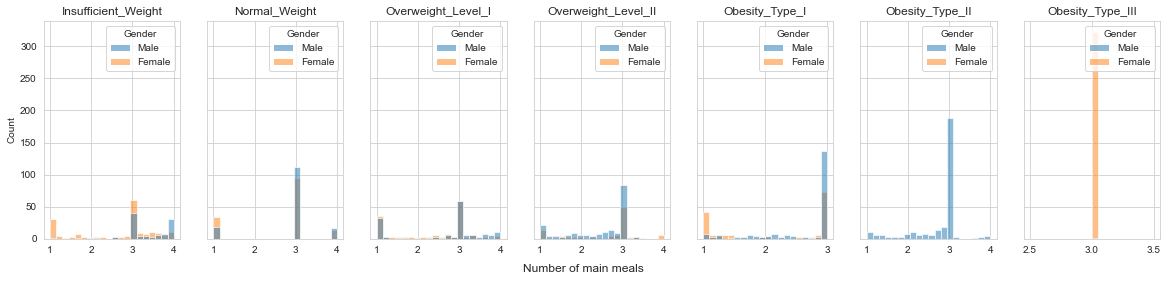

In [134]:
fig, axs = plt.subplots(1, len(sets), figsize=(20, 4), sharey=True)
for s in range(len(sets)):
    sns.histplot(data=sets[s], ax=axs[s], x="NCP", hue="Gender", hue_order=hue_ord, bins=20).set_title(categ[s])
    axs[s].set(xlabel=None)
fig.text(0.5, 0.01, 'Number of main meals', ha='center', size=12)

In general, attendants have 3 mail meals daily. It is interesting that individuals having 1 main meal are distinguishable in the plots of several categories.

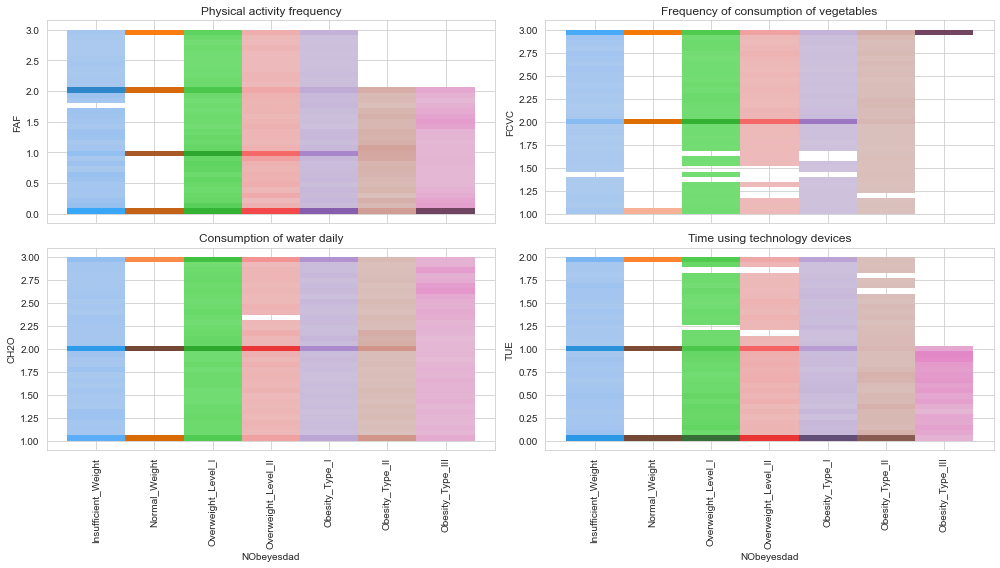

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
sns.histplot(ax=axs[0 ,0], x="NObeyesdad", y="FAF", hue="NObeyesdad", data=data, bins=35)
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].set_title("Physical activity frequency")
axs[0, 0].get_legend().remove()
sns.histplot(ax=axs[1 ,0], x="NObeyesdad", y="CH2O", hue="NObeyesdad", data=data, bins=35)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_title("Consumption of water daily")
axs[1, 0].get_legend().remove()
#axs[1, 0].sharex(axs[0, 0])
sns.histplot(ax=axs[0 ,1], x="NObeyesdad", y="FCVC", hue="NObeyesdad", data=data, bins=35)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].set_title("Frequency of consumption of vegetables")
axs[0, 1].get_legend().remove()
sns.histplot(ax=axs[1 ,1], x="NObeyesdad", y="TUE", hue="NObeyesdad", data=data, bins=35)
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_title("Time using technology devices")
axs[1, 1].get_legend().remove()
plt.xticks(rotation=90)
fig.tight_layout()

It can be said that individuals with higher levels of obesity exercise less frequently. For the other features, it is hard to generalize patterns.

Text(0.5, 1.0, 'Consumption of alcohol')

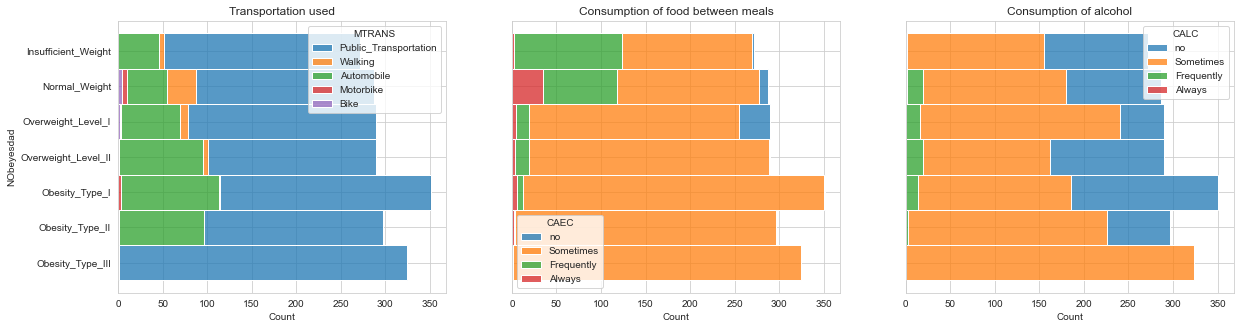

In [136]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
hue_ord = ["no", "Sometimes", "Frequently", "Always"]
sns.histplot(ax=axs[0], binwidth=0.5, y="NObeyesdad", hue="MTRANS", data=data, stat="count", multiple="stack")
axs[0].set_title("Transportation used")
sns.histplot(ax=axs[1], binwidth=0.5, y="NObeyesdad", hue="CAEC", data=data, stat="count", multiple="stack", hue_order=hue_ord)
axs[1].set_title("Consumption of food between meals")
sns.histplot(ax=axs[2], binwidth=0.5, y="NObeyesdad", hue="CALC", data=data, stat="count", multiple="stack", hue_order=hue_ord)
axs[2].set_title("Consumption of alcohol")

As can be seen in the first plot, public transportation is the most popular type of transportation preferred by most of the attendants. Using automobiles comes second. There is also a visible difference in walking preferences for individuals having lower levels of obesity.

The second plot illustrates that individuals consume food between the meals "sometimes". It can also be seen that individuals with lower levels of obesity tend to consume food between meals more frequently compared to others.

The third plot shows that alcohol consumptions are quite similar when different categories are compared to one another.


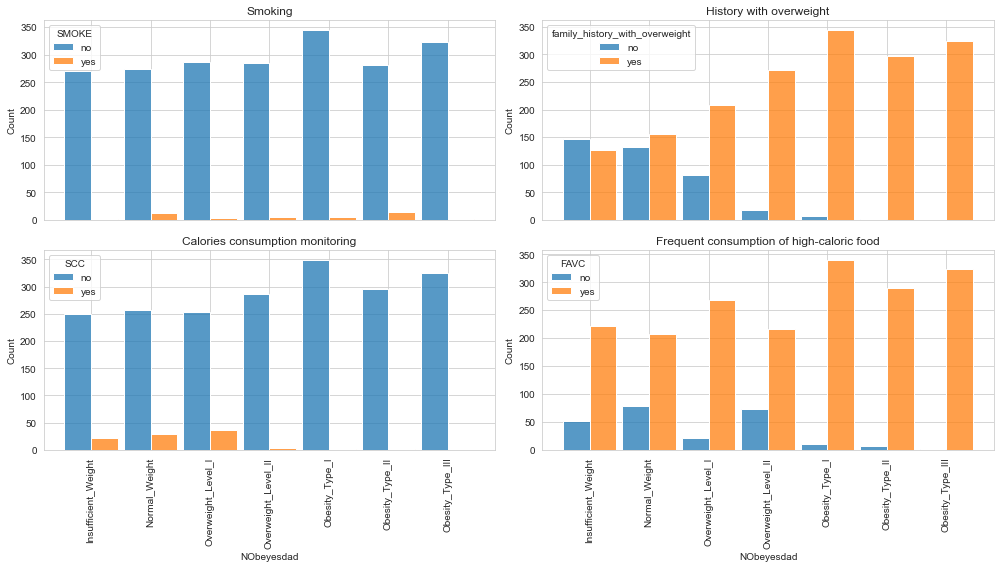

In [137]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
sns.histplot(data=data, ax=axs[0, 0], x="NObeyesdad", hue="SMOKE", multiple="dodge", shrink=.9)
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].set_title("Smoking")
sns.histplot(data=data, ax=axs[1, 0], x="NObeyesdad", hue="SCC", multiple="dodge", shrink=.9)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_title("Calories consumption monitoring")
#axs[1, 0].sharex(axs[0, 0])
sns.histplot(data=data, ax=axs[0, 1], x="NObeyesdad", hue="family_history_with_overweight",hue_order=["no", "yes"], multiple="dodge", shrink=.9)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].set_title("History with overweight")
sns.histplot(data=data, x="NObeyesdad", hue="FAVC", multiple="dodge", shrink=.9)
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_title("Frequent consumption of high-caloric food")
plt.xticks(rotation=90)
fig.tight_layout()

From these plots, it is hard to see the relationship between the target with smoking or calorie monitoring. However, it can be seen that family history with obesity may increase the chances of individuals having higher levels of obesity. Furthermore, frequent consumption of high-caloric food might also be causing higher levels of obesity.

### 4. Classification models

#### 4.1. Feature engineering

Categorical variables must be one-hot-encoded. Since distance-based classification models will be used, numerical variables also must be scaled. There are several columns representing the frequency, however, these columns are represented with floats, not integers. Therefore, they are considered as numerical columns instead of ordinal.

In [138]:
datac = data.copy() # backup data
y = data["NObeyesdad"]
X = data.drop("NObeyesdad", axis=1)
one_hot_encode_cols = X.dtypes[X.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical columns
X[one_hot_encode_cols].columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [139]:
num_columns = list(X.select_dtypes('float64').columns) # list of numerical columns
num_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [140]:
from sklearn.preprocessing import LabelEncoder

print(np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y) # label encoder for the target
np.unique(y)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


array([0, 1, 2, 3, 4, 5, 6])

In [141]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=77)

train_idx, test_idx = next(strat_shuff_split.split(X, y))

# create the train and test sets
X_train = X.iloc[train_idx]
y_train = y[train_idx]

X_test = X.iloc[test_idx]
y_test = y[test_idx]

The train and test sets are split with stratified shuffle split, to create balanced train and test sets. The reason behind of creating test sets, is to avoid overfitting with the grid search cross validation. Only train sets will be used to fit the models, the test sets will remain unseen. Then, prediction will be executed on the test sets with the best model configuration returned by GridSearchCV.

#### 4.2. Logistic Regression

As a baseline model, logistic regression will be used with GridSearch cross validation. Since the target classes are considered as balanced, F1 and ROC-AUC (One vs Rest) scores will be assessed while comparing the models.

In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # for null values, can be added to the numerical transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("cat", categorical_transformer, one_hot_encode_cols),
    ]
)

# preprocess + classifier = full prediction pipeline
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=77))]
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

params = {
    'classifier__penalty': ["l2"], # solver allows only l2 penalty
}

grid_lr = GridSearchCV(clf, params, cv=skf, scoring="f1_macro")
grid_lr.fit(X_train, y_train)
pd.DataFrame(grid_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054998,0.003693,0.000351,0.000523,l2,{'classifier__penalty': 'l2'},0.862464,0.883443,0.881281,0.872586,0.826294,0.865213,0.020819,1


In [143]:
grid_lr.best_score_, grid_lr.best_params_

(0.8652133945796796, {'classifier__penalty': 'l2'})

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        82
           1       0.84      0.67      0.75        86
           2       0.93      0.79      0.86       106
           3       0.87      0.99      0.93        89
           4       0.98      1.00      0.99        97
           5       0.78      0.75      0.76        87
           6       0.75      0.82      0.78        87

    accuracy                           0.85       634
   macro avg       0.85      0.85      0.85       634
weighted avg       0.86      0.85      0.85       634

F1 score:  0.8498926983680877
ROC-AUC score 0.9835442664038327


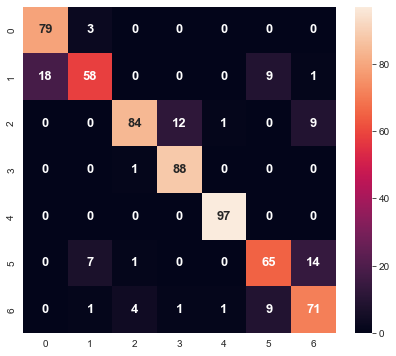

In [144]:
y_pred = grid_lr.predict(X_test)
y_prob = grid_lr.predict_proba(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('ROC-AUC score', roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d', ax=ax, annot_kws={"size": 13, "weight": "bold"})

Both of the evaluation scores are considerately high, which points out that the model performs well. The model seems to confuse the "overweight" levels with each other, also "normal weight" with "insufficient weight" at most.

#### 4.3.Decision Trees

In [145]:
from sklearn.tree import DecisionTreeClassifier

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(random_state=77))]
)

params = {'classifier__max_depth':range(5, 100, 5),
          'classifier__criterion':['gini','entropy'],
          'classifier__max_features': [None, "sqrt", "log2"]}

grid_dt = GridSearchCV(clf, params, cv=skf, scoring="f1_macro")
grid_dt.fit(X_train, y_train)
grid_dt.best_score_, grid_dt.best_params_

(0.9273748459952026,
 {'classifier__criterion': 'entropy',
  'classifier__max_depth': 10,
  'classifier__max_features': None})

              precision    recall  f1-score   support

           0       0.99      0.96      0.98        82
           1       0.89      0.92      0.90        86
           2       0.96      0.95      0.96       106
           3       0.97      0.98      0.97        89
           4       1.00      1.00      1.00        97
           5       0.88      0.90      0.89        87
           6       0.95      0.92      0.94        87

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634

F1 score:  0.9470878494980138
ROC-AUC score 0.969136221450601


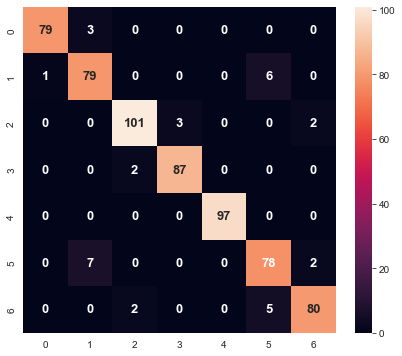

In [146]:
y_pred = grid_dt.predict(X_test)
y_prob = grid_dt.predict_proba(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('ROC-AUC score', roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d', ax=ax, annot_kws={"size": 13, "weight": "bold"})

The decision tree model predicted the classes better compared to the logistic regression model. According to the scores, the model seems to perform well.

#### 4.4. Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=77))]
)

params = {'classifier__max_depth':range(5, 50, 5),
          'classifier__n_estimators':[50, 100, 200, 400],
          'classifier__criterion':['gini','entropy'],
          'classifier__warm_start':[True, False],
          'classifier__max_features': [None, "sqrt", "log2"]}

grid_rf = GridSearchCV(clf, params, cv=skf, scoring="f1_macro")
grid_rf.fit(X_train, y_train)
grid_rf.best_score_, grid_rf.best_params_

(0.9587605791801075,
 {'classifier__criterion': 'entropy',
  'classifier__max_depth': 15,
  'classifier__max_features': None,
  'classifier__n_estimators': 200,
  'classifier__warm_start': True})

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.95      0.94      0.95        86
           2       0.98      0.99      0.99       106
           3       0.99      1.00      0.99        89
           4       1.00      1.00      1.00        97
           5       0.94      0.95      0.95        87
           6       0.99      0.95      0.97        87

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

F1 score:  0.9755495951627637
ROC-AUC score 0.9990277709334104


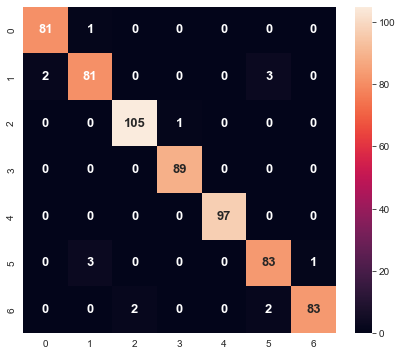

In [148]:
y_pred = grid_rf.predict(X_test)
y_prob = grid_rf.predict_proba(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('ROC-AUC score', roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d', ax=ax, annot_kws={"size": 13, "weight": "bold"})

The random forest model provided the best results in terms of the scores so far.

#### 4.5. Adaptive Boosting (Adaboost)

Adaptive boosting is applied with decision trees as weak learners. The best parameters found for the decision tree classifier are used again.


In [149]:
from sklearn.ensemble import AdaBoostClassifier

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", max_depth=10, max_features=None, random_state=77), random_state=77))]
)

params = {'classifier__n_estimators': [100, 150, 200, 300],
          'classifier__learning_rate': [0.1, 0.01, 0.001]}

grid_ada = GridSearchCV(clf, params, cv=skf, scoring="f1_macro")
grid_ada.fit(X_train, y_train)
grid_ada.best_score_, grid_ada.best_params_

(0.9302416941681502,
 {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100})

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.92      0.94      0.93        86
           2       0.96      0.95      0.96       106
           3       0.97      0.98      0.97        89
           4       1.00      1.00      1.00        97
           5       0.91      0.91      0.91        87
           6       0.95      0.92      0.94        87

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

F1 score:  0.9551405952683293
ROC-AUC score 0.9740139092917462


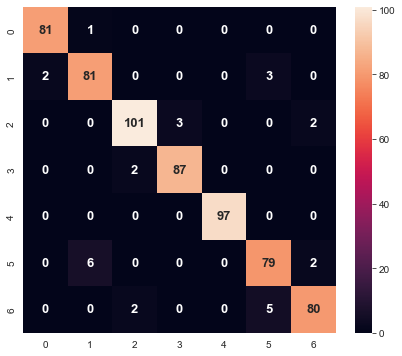

In [150]:
y_pred = grid_ada.predict(X_test)
y_prob = grid_ada.predict_proba(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('ROC-AUC score', roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d', ax=ax, annot_kws={"size": 13, "weight": "bold"})

Adaboost performed significantly well, however, random forest is the best model considering F1 score, ROC AUC score, and also accuracy.

### 5. Final model

Random forest is recommended as the final model since it is the best according to the performance criteria. As the objective here is to predict the classes of the individuals as accurate as possible, random forest performed the best.

Let's look at the feature importances found by the random forest model.

In [151]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test) # the final predictions
feature_imp = pd.Series(best_model.steps[1][1].feature_importances_, index=best_model.steps[0][1].get_feature_names_out()).sort_values(ascending=False)
feature_imp = feature_imp[feature_imp > 0.01]
feature_imp

num__Weight           0.606612
num__Height           0.189429
cat__Gender_Female    0.068071
cat__Gender_Male      0.050809
num__Age              0.019739
num__CH2O             0.012592
dtype: float64

Text(0.5, 1.0, 'Feature Importances')

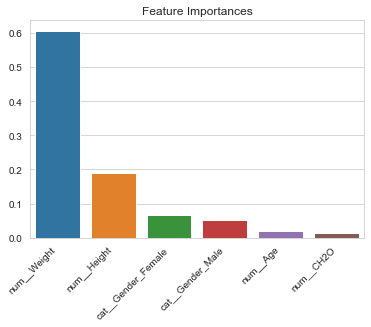

In [152]:
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Feature Importances")

### 6. Findings and suggestions

The feature importances of the proposed model show that weight, height, gender, age, and water consumption features are the most important features while classifying obesity levels. Especially weight and height being the most important features makes sense because the classification of obesity levels are decided according to the _mass body index_ calculation in the source.

There is a limited number of observations in the data. Moreover, there are plenty of rows that are generated by the authors to balance the target class. These limitations might be causing the models to be less convenient in real life. The expected obesity class for a population would be "normal weight". Under-overweight and obesity cases are expected to be seen less. Therefore, an extension of data would be beneficial.

To conclude, the prediction performance of the recommended model can be considered powerful according to the confusion matrix and classification scores used. However, there is a need to include more real-life observations, to be able to reflect the relationships between the features more accurately.

_by Sude Kocaçiftçi Bayraktar_